<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_02a_perceptron/PerceptronSimples_02_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Simples

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

Aula 01A: Perceptron Simples

Exemplo 02: Executando Perceptron Simples no Iris

Prof. Dr. Rafael Gomes mantovani

---

In [2]:
# Adicionando um seed para reproducibilidade do exemplo 
set.seed(42)

Iremos desenvolver duas funções prinicpais:

* **perceptron.train**: treina um perceptron simples no conjunto de treinamento fornecido como entrada 
* **perceptron.test**: faz a predição para os valores contidos em um novo conjunto de teste

In [3]:
# -------------------------------------------------------------------------------------------------
# Perceptron.train 
#    - train.set: conjunto de treinamento
#    - weights:   são os pesos sinápticos da rede
#    - lrn.rate:  taxa de aprendizado, para ajuste sináptico
#    - epochs:    numero maximo de iterações para treinamento, caso não haja convergência
# -------------------------------------------------------------------------------------------------

perceptron.train = function(train.set, weights = NULL, lrn.rate = 0.3, n.iter = 1000) {
  
  # iniciando variaveis de controle
  epochs = 0
  error  = TRUE
  
  # se não passamos valores iniciais para os pesos sinápticos do percentron, 
  # eles serão gerados aleatoriamente com valores entre {-1, +1}
  if(is.null(weights)) {
    weights = runif(ncol(train.set)-1,-1,1)
  }
  
  # mostrando os pesos gerados/recebidos
  cat("Pesos iniciais: ", weights, "\n")
 
  # criamos um vetor para armazenar o erro médio por época
  avgErrorVec = c()

  # variável de controla para especificar qual coluna do dataset contem a classe (target/label)
  class.id = ncol(train.set)
  
  # enquanto houver erro em pelo menos um dos exemplos && número de épocas for
  # menor do que o número máximo de épocas que definimos
  while(error & epochs < n.iter) {
    
    error  = FALSE
    epochs = epochs + 1
    avgError = 0
    # cat("Época:", epochs,"\n")
    
    # vamos iterar sobre todos os exemplos do dataset (== época)
    for(i in 1:nrow(train.set)) {
      
      # acessamos o exemplo atual 
      example = as.numeric(train.set[i,])
      
      # calculamos a ativação do perceptron (spike)
      x = example[-class.id]
      v = as.numeric(x %*% weights)
      
      # gerando a saída do neurônio
      y = ifelse(v >=0, +1, -1) 
      # outro comando que funcionaria seria: y = sign(v)
      
      # vamos adicionar o erro quadrático do exemplo ao erro da época
      avgError = avgError + ((example[class.id] - y)^2)
      
      # se a predição foi errada, temos que atualizar os pesos do perceptron
      if(example[class.id] != y) {
        # cat(" - ajuste de pesos necessário (predição errada) ...\n")
        weights = weights + lrn.rate * (example[class.id] - y) * example[-class.id]
        error = TRUE
      }
      # print(weights)
    }
    
    # fim do ciclo da época, vamos armazenar o erro quadrático da época
    avgError = avgError/nrow(train.set)
    avgErrorVec = c(avgErrorVec, avgError)
    cat("Época: ", epochs," - Avg Error = ", avgError, "\n")
  }

  # chegando aqui, o perceptron terminou de treinar ou estourou o limite
  # de épocas possíveis ...
  
  # vamos retornar um objeto com algumas informações para análises
  #  - weights     --> são os pesos finais obtidos, que classificam tudo correntamente (modelo)
  #  - avgErrorVec --> array com o erro quadrático médio por época
  #  - epochs      --> quantidade de épocas necessária para treinar o modelo de perceptron 
  obj = list(weights = weights, avgErrorVec = avgErrorVec, epochs = epochs)
  
  cat("\n* Finalizado depois de : ",epochs,"  épocas\n")
  return(obj)
}


In [4]:
# -----------------------------------------------------------------
# Perceptron.test: avalia novos exemplos depois que o modelo foi treinado, 
# usando os pesos sinápticos objetidos no treinamento
#    - conjunto de teste
#    - weights: são os pesos sinápticos obtidos no treinamento (perceptron.train)
# -----------------------------------------------------------------

perceptron.predict = function(test.set, weights) {
  
  v = as.numeric(test.set %*% weights)
  # também funcionaria como: v = sum(test.set * weights)
  y = ifelse(v>=0, +1, -1)
  return(y)
}


In [5]:
# para gerar algumas análies gráficas vamos carregar o pacote ggplot2
library("ggplot2")

In [6]:
# -----------------------------------------------------------------
# Carregando dataset iris
# -----------------------------------------------------------------

dataset = iris
head(dataset) 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [8]:
# Estatisticas
dim(dataset)
names(dataset)
summary(dataset$Species)

[1] 150   5

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

setosa versicolor  virginica 
        50         50         50

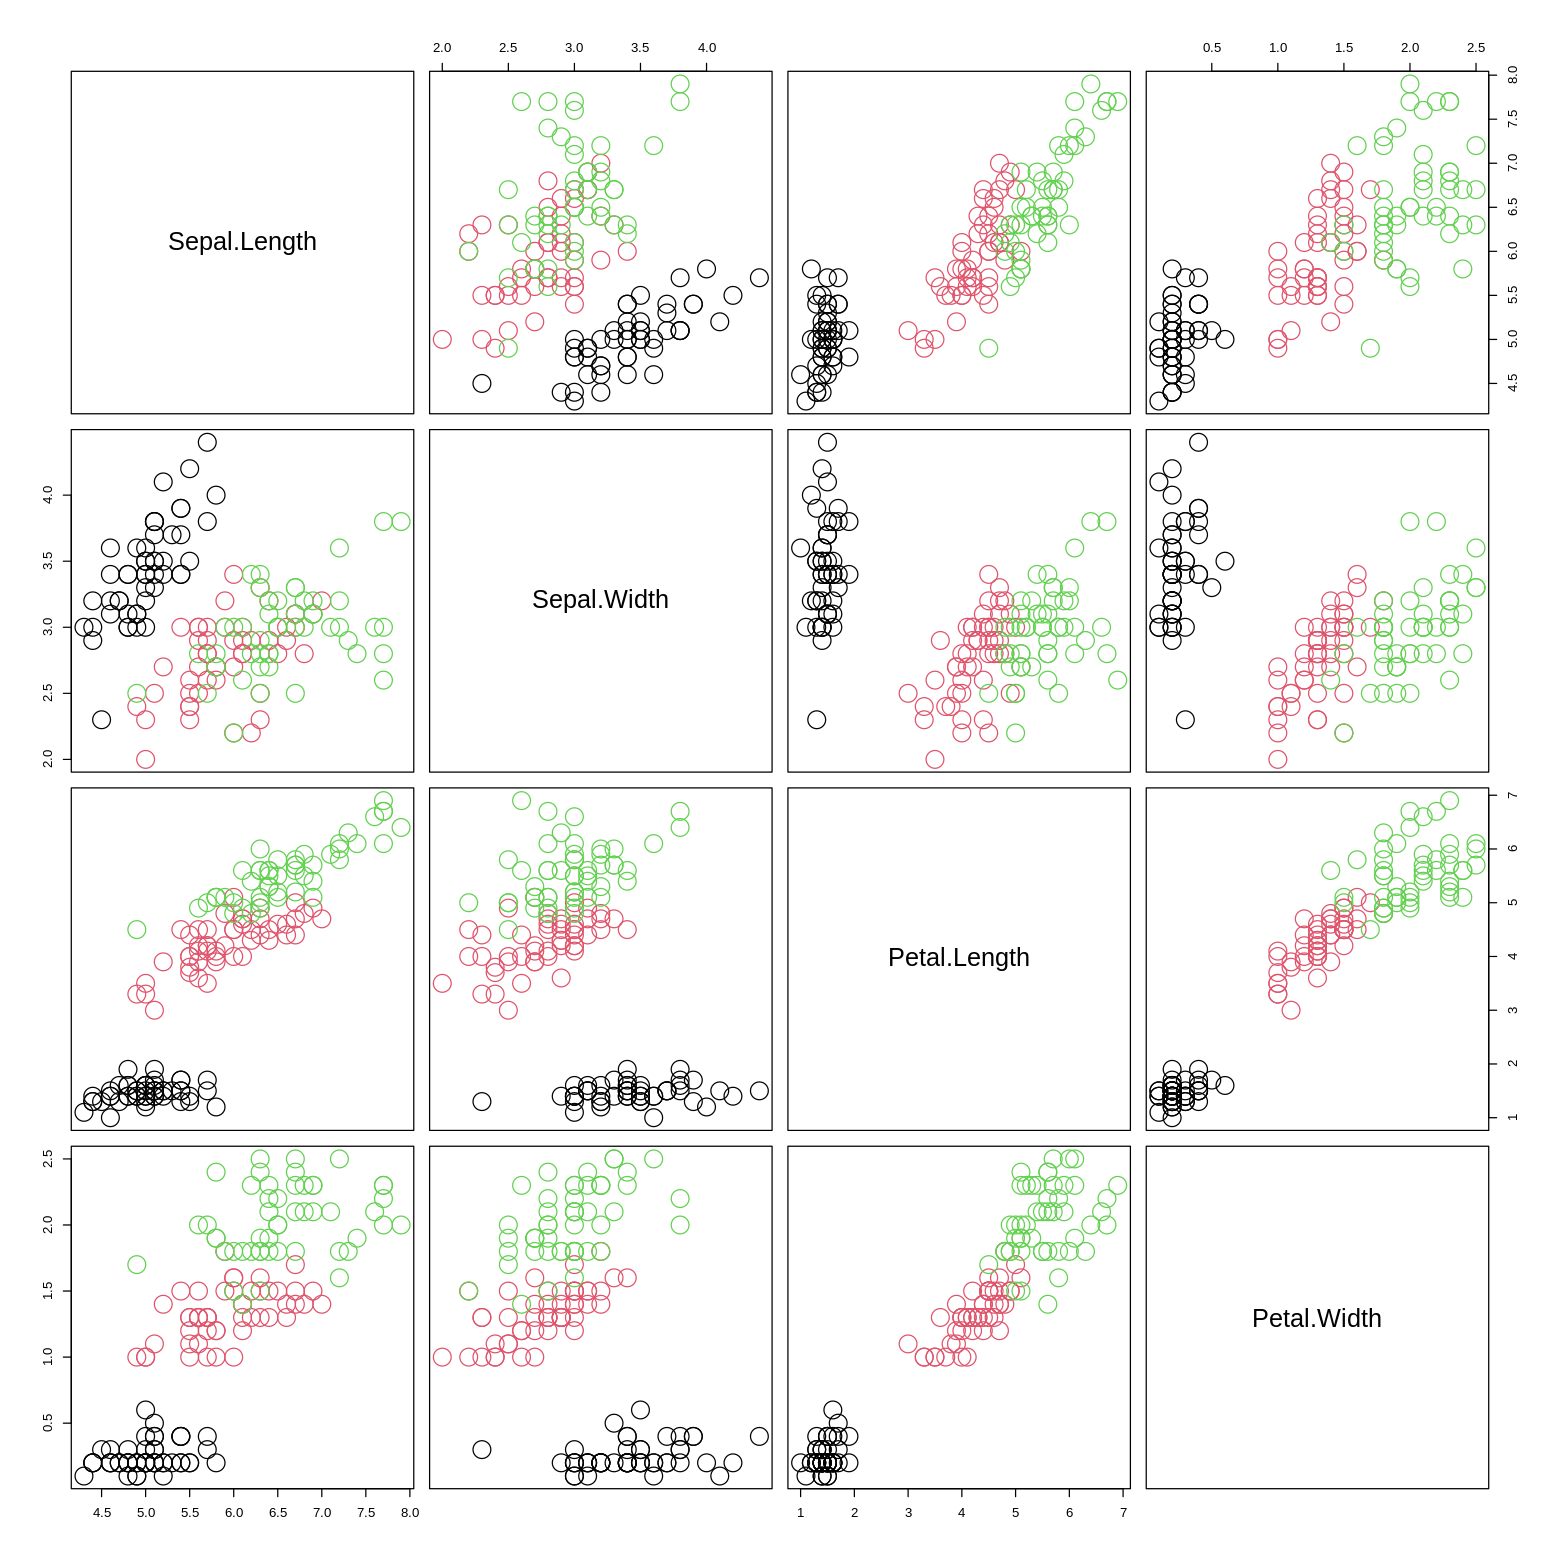

In [13]:
# -----------------------------------------------------------------
# plot: data separability
# -----------------------------------------------------------------

options(repr.plot.width=13, repr.plot.height=13)
pairs(dataset[,-ncol(dataset)], col=dataset$Species, cex=3)


In [15]:
# -----------------------------------------------------------------
# subsetting dataset
# -----------------------------------------------------------------

# Selecting only two features + Class (Species)
X = dataset[ , c(2,4,5)]

# Binarizing the problem = 2 classes (Setosa VS Virginica + Versicolor)
X$Species = ifelse(X$Species == "setosa", +1, -1)
X = cbind(1, X)
colnames(X)[1] = "bias"

In [17]:
table(X$Species)
head(X)


 -1   1 
100  50 

,bias,Sepal.Width,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3.5,0.2,1
2,1,3.0,0.2,1
3,1,3.2,0.2,1
4,1,3.1,0.2,1
5,1,3.6,0.2,1
6,1,3.9,0.4,1


In [18]:
# -----------------------------------------------------------------
# Treinando o perceptron
# -----------------------------------------------------------------

# conjunto de treinamento = dataset
# taxa de aprendizado     = 0.3

obj = perceptron.train(train.set = X, lrn.rate = 0.1)

Pesos iniciais:  0.8296121 0.8741508 -0.4277209 
Época:  1  - Avg Error =  0.05333333 
Época:  2  - Avg Error =  0.05333333 
Época:  3  - Avg Error =  0.05333333 
Época:  4  - Avg Error =  0.05333333 
Época:  5  - Avg Error =  0.05333333 
Época:  6  - Avg Error =  0.05333333 
Época:  7  - Avg Error =  0.05333333 
Época:  8  - Avg Error =  0.05333333 
Época:  9  - Avg Error =  0.05333333 
Época:  10  - Avg Error =  0.05333333 
Época:  11  - Avg Error =  0 

* Finalizado depois de :  11   épocas


In [19]:
# -----------------------------------------------------------------
# criar dataframe com o historico do treinamento 
# (epoca - erro da epoca)
# -----------------------------------------------------------------

df = data.frame(1:obj$epochs, obj$avgErrorVec)
colnames(df) = c("epoch", "avgError")
head(df)

,epoch,avgError
,<int>,<dbl>
1,1,0.05333333
2,2,0.05333333
3,3,0.05333333
4,4,0.05333333
5,5,0.05333333
6,6,0.05333333


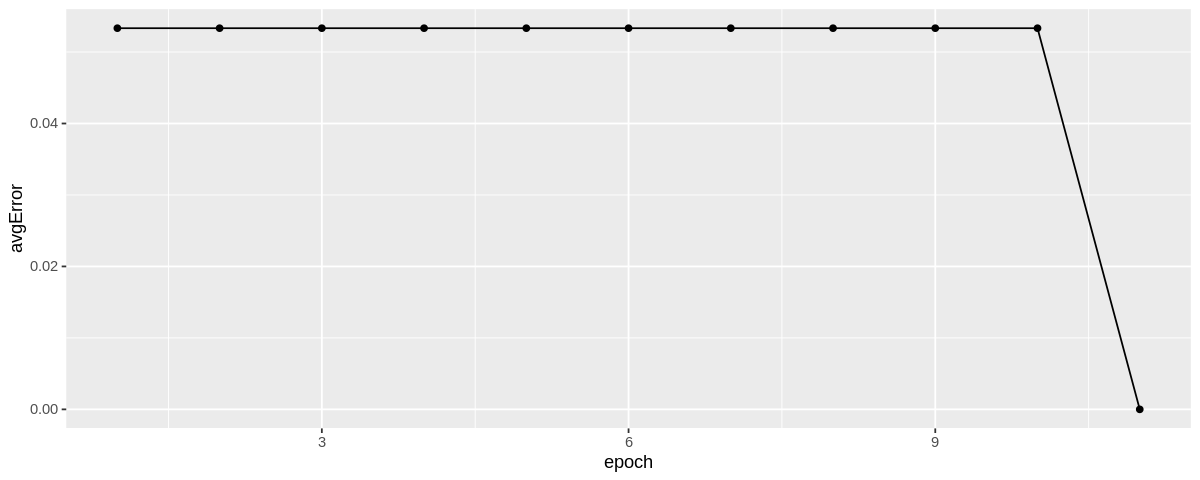

In [20]:
# -----------------------------------------------------------------
# Plotar a curva de convergência do erro de treinamento
# -----------------------------------------------------------------

g = ggplot(df, mapping = aes(x = epoch, y = avgError))
g = g + geom_line() + geom_point() 
g = g + scale_x_continuous(limit = c(1, nrow(df)))

options(repr.plot.width=10, repr.plot.height=4)
print(g)


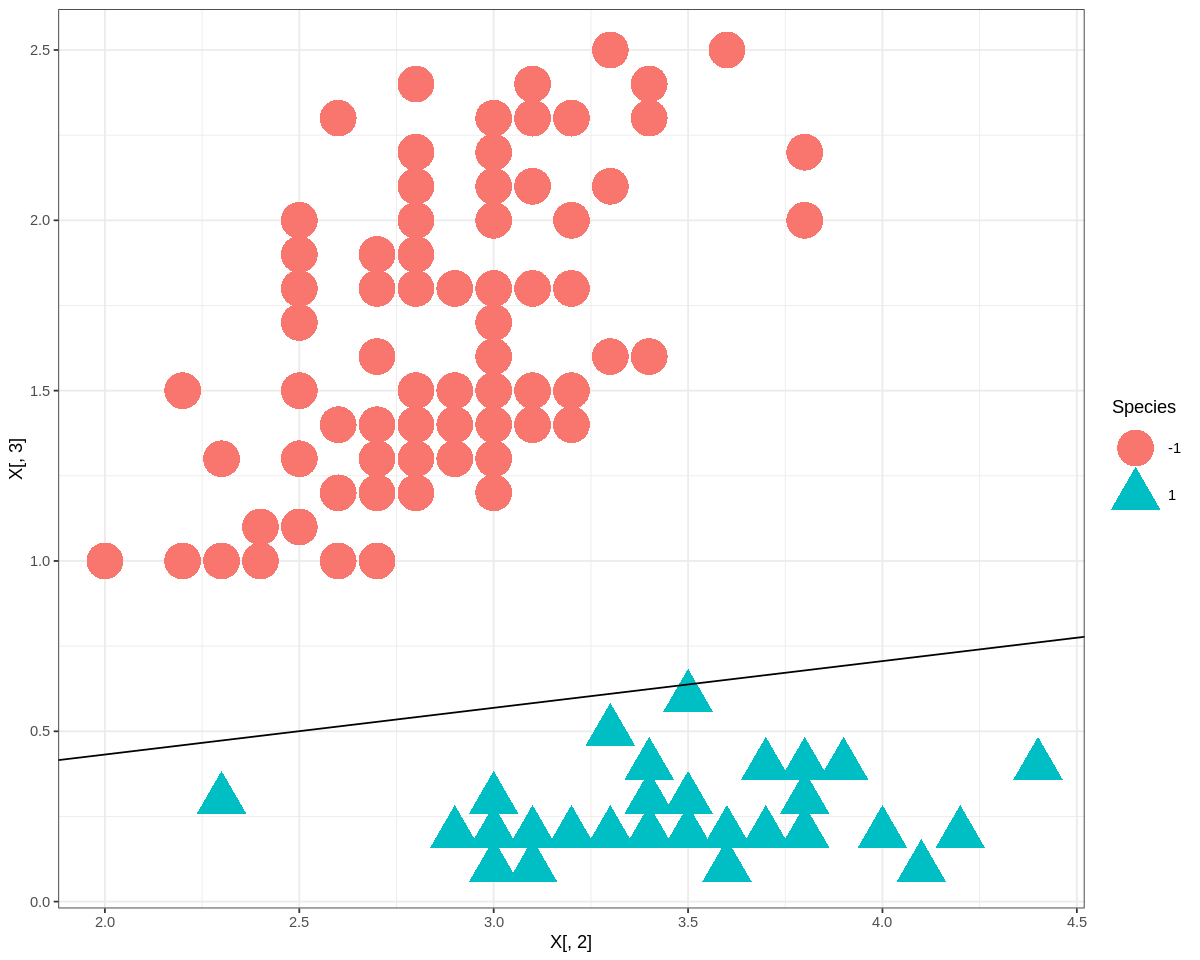

In [29]:
# -----------------------------------------------------------------
# Plotando o hiper plano separador
# -----------------------------------------------------------------

dataPlot = X
dataPlot$Species = as.factor(dataPlot$Species)
g2 = ggplot(dataPlot, mapping = aes(x = X[,2], y = X[,3], colour = Species , shape = Species))
g2 = g2 + geom_point(size = 10) + theme_bw()

# Adicionar o hiperplano (reta separadora)
w0 = obj$weights[1] # peso do bias
w1 = obj$weights[2]
w2 = obj$weights[3]

slope     = -(w0/w2)/(w0/w1)
intercept = -w0/w2

g2 = g2 + geom_abline(intercept = intercept, slope = slope)

# visualizando ...
options(repr.plot.width=10, repr.plot.height=8)
print(g2)

In [30]:
# -----------------------------------------------------------------
# Testando os modelos treinados em exemplos artificiais
# -----------------------------------------------------------------

test1 = c(1,0.4,0.5)
res1 = perceptron.predict(test.set = test1, weights = obj$weights)
cat(" - Exemplo: ", test1, " - Classe predita: ", res1, "\n")

test2 = c(1,2.5,0.3)
res2 = perceptron.predict(test.set = test2, weights = obj$weights)
cat(" - Exemplo: ", test2, " - Classe predita: ", res2, "\n")


 - Exemplo:  1 0.4 0.5  - Classe predita:  -1 
 - Exemplo:  1 2.5 0.3  - Classe predita:  1 


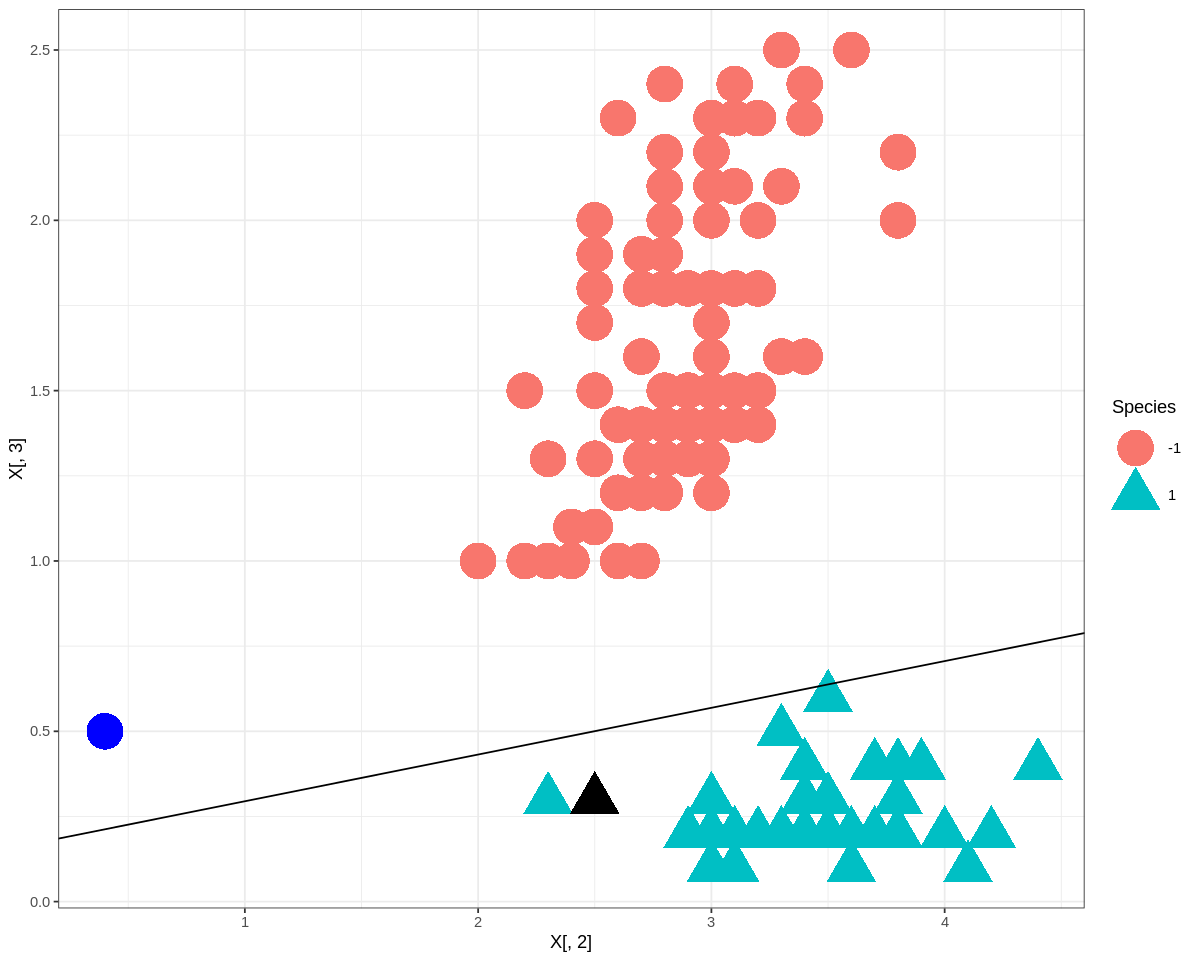

In [33]:
# -----------------------------------------------------------------
# vendo nossas predições 
# -----------------------------------------------------------------

g3 = g2 + annotate("point", x = test1[2], y = test1[3], colour = "blue", size = 10, shape = 16)
g3 = g3 + annotate("point", x = test2[2], y = test2[3], colour = "black", size = 10, shape = 17)
print(g3)
